In [1]:
try:
    from linclab_utils import plot_utils
except ImportError as err:
    !pip install -q git+https://github.com/linclab/linclab_utils.git
    from linclab_utils import plot_utils

In [2]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
plot_utils.linclab_plt_defaults(font="Arial", fontdir="fonts")
from matplotlib.pyplot import cm
import re
import math
import matplotlib.gridspec as gridspec
import json
import matplotlib.patches as mpatches

In [3]:
api = wandb.Api(timeout=19)

In [4]:
# Fetch runs for a specific project
def fetch_runs(api, entity, project_name, filters, order=None):
    if order:
        runs = api.runs(f"{entity}/{project_name}", filters=filters, order=order)
    else:
        runs = api.runs(f"{entity}/{project_name}", filters=filters)
    #print(f"Runs for project '{project_name}':")
    return runs

In [5]:
def same_config(config1, config2, keys=['normtype']):
    for key in keys:
        if config1[key] != config2[key]:
            return False
    return True

Text(0.5, 1.0, 'LN on EI Network')

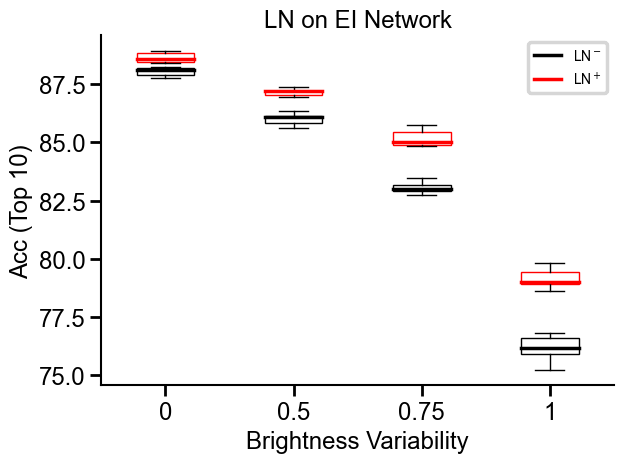

In [6]:
fig, ax = plt.subplots()
brightness_factor = [0, 0.5, 0.75, 1]
best_n_runs = 10
noln_acc = []
ln_acc = []
nograd_acc = []
lmbda=1

for bf in brightness_factor:

    layernorm_ei_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]
    no_layernorm_ei_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 0, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]

    layernorm_ei_network_nograd = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 1,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]
    
                                                                
    noln_acc.append([run_noln.summary['test_acc'] for run_noln in no_layernorm_ei_network ])
    ln_acc.append([run_ln.summary['test_acc'] for run_ln in layernorm_ei_network])
    nograd_acc.append([run_noln.summary['test_acc'] for run_noln in layernorm_ei_network_nograd ])

bp1 = ax.boxplot(np.array(noln_acc).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
                         showbox=True, showfliers=False)
bp2 = ax.boxplot(np.array(ln_acc).T, patch_artist=True, boxprops=dict(color='red', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='red'),
                         showfliers=False)
# bp3 = ax.boxplot(np.array(nograd_acc).T, patch_artist=True, boxprops=dict(color='red', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='blue'),
#                          showfliers=False)
# Create custom x-axis tick labels
custom_xticks = ['0', '0.5', '0.75', '1']
ax.set_xticks(np.arange(1, len(custom_xticks) + 1))
ax.set_xticklabels(custom_xticks)

ax.set_xlabel('Brightness Variability')
ax.set_ylabel(f'Acc (Top {best_n_runs})')
# ax.legend([bp1["medians"][0], bp2["medians"][0], bp3["medians"][0]], ['LN$^-$', 'LN$^+$', 'LN$^+$ no grad'], fontsize="10", loc ="best")
ax.legend([bp1["medians"][0], bp2["medians"][0]], ['LN$^-$', 'LN$^+$'], fontsize="10", loc ="best")
#ax.set_yscale('log')
ax.set_title('LN on EI Network')

Text(0.5, 1.0, 'Divisive LN on EI Network')

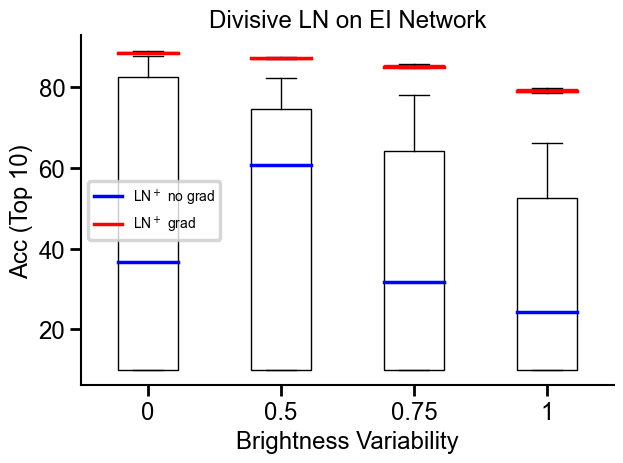

In [7]:
fig, ax = plt.subplots()
brightness_factor = [0, 0.5, 0.75, 1]
best_n_runs = 10
noln_acc = []
ln_acc = []
lmbda=1

for bf in brightness_factor:

    layernorm_ei_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]

    layernorm_ei_network_nograd = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 1,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]
    
                                                                
    noln_acc.append([run_noln.summary['test_acc'] for run_noln in layernorm_ei_network_nograd ])
    ln_acc.append([run_ln.summary['test_acc'] for run_ln in layernorm_ei_network])

bp1 = ax.boxplot(np.array(noln_acc).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='blue'),
                         showbox=True, showfliers=False)
bp2 = ax.boxplot(np.array(ln_acc).T, patch_artist=True, boxprops=dict(color='red', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='red'),
                         showfliers=False)
# Create custom x-axis tick labels
custom_xticks = ['0', '0.5', '0.75', '1']
ax.set_xticks(np.arange(1, len(custom_xticks) + 1))
ax.set_xticklabels(custom_xticks)

ax.set_xlabel('Brightness Variability')
ax.set_ylabel(f'Acc (Top {best_n_runs})')
#ax.set_ylim(9, 11)
ax.legend([bp1["medians"][0], bp2["medians"][0]], ['LN$^+$ no grad', 'LN$^+$ grad'], fontsize="10", loc ="best")
#ax.set_yscale('log')
ax.set_title('Divisive LN on EI Network')

Text(0.5, 1.0, 'LN on E Network (w/wo gradient correction)')

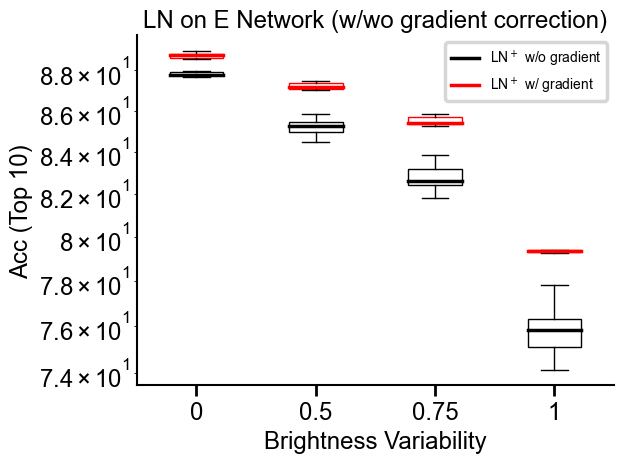

In [7]:
fig, ax = plt.subplots()
brightness_factor = [0, 0.5, 0.75, 1]
best_n_runs = 10
noln_e_acc = []
ln_e_acc = []
lmbda=1

for bf in brightness_factor:

    layernorm_e_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]
    layernorm_e_no_bkwd_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 1,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]
    
                                                                
    noln_e_acc.append([run_noln.summary['test_acc'] for run_noln in layernorm_e_no_bkwd_network ])
    ln_e_acc.append([run_ln.summary['test_acc'] for run_ln in layernorm_e_network])

bp1_e = ax.boxplot(np.array(noln_e_acc).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
                         showbox=True, showfliers=False)
bp2_e = ax.boxplot(np.array(ln_e_acc).T, patch_artist=True, boxprops=dict(color='red', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='red'),
                         showfliers=False)
# Create custom x-axis tick labels
custom_xticks = ['0', '0.5', '0.75', '1']
ax.set_xticks(np.arange(1, len(custom_xticks) + 1))
ax.set_xticklabels(custom_xticks)

ax.set_xlabel('Brightness Variability')
ax.set_ylabel(f'Acc (Top {best_n_runs})')
ax.legend([bp1_e["medians"][0], bp2_e["medians"][0]], ['LN$^+$ w/o gradient', 'LN$^+$ w/ gradient'], fontsize="10", loc ="best")
ax.set_yscale('log')
ax.set_title('LN on E Network (w/wo gradient correction)')

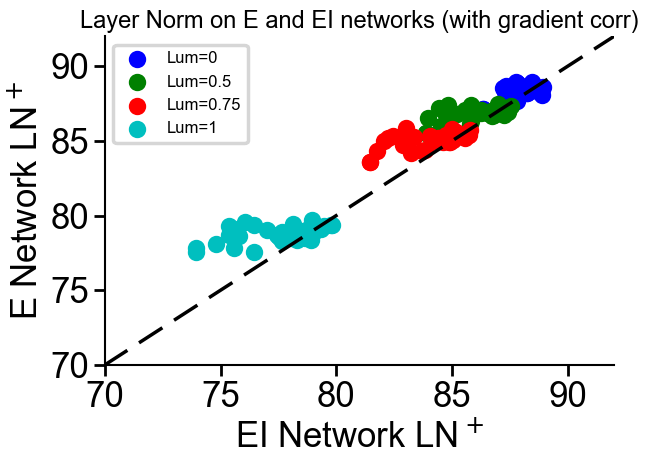

In [8]:

fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')
clr = ['b', 'g', 'r', 'c']

for idx, bfi in enumerate([0, 0.5, 0.75, 1]):

    runs_dict = dict()
    runs_dict["runs_e_network_ln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                                "config.brightness_factor": bfi, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                                "config.use_testset": True}, order="-summary_metrics.test_acc")
    runs_dict["runs_ei_network_ln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                                "config.brightness_factor": bfi, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                                "config.use_testset": True}, order="-summary_metrics.test_acc")

    top_n = len(runs_dict["runs_e_network_ln"])

    for top in range(top_n):

        vanilla_dann_acc = runs_dict["runs_e_network_ln"][top].summary['test_acc']

        for rn in runs_dict["runs_ei_network_ln"]:
            if same_config(rn.config, runs_dict["runs_e_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
                plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color=clr[idx])

    plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color=clr[idx], label=f"Lum={bfi}")

ax.set_xlabel(f"EI Network LN$^+$", fontsize=25)
ax.set_ylabel("E Network LN$^+$", fontsize=25)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_title(f"Layer Norm on E and EI networks (with gradient corr)", fontsize=17)
list_line = range(100)
ax.set_xlim(70, 92)
ax.set_ylim(70, 92)
ax.legend(prop={'size': 12})
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

In [6]:
bright_factor = 1
runs_dict = dict()
runs_dict["runs_e_network_ln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")
runs_dict["runs_e_network_ln_nograd"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 1,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")
runs_dict["runs_e_network_noln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.layer_norm": 0, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")

runs_dict["runs_ei_network_ln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")

runs_dict["runs_ei_network_noln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.layer_norm": 0, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")

runs_dict["runs_ei_network_ln_nograd"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.layer_norm": 1, "config.excitation_training": 0, "config.normtype_detach": 1,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")
runs_dict["runs_mean_homeostatic_network"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bright_factor, "config.divisive_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.homeostasis":1, "config.use_testset": True}, order="-summary_metrics.test_acc")
runs_dict["runs_mean_homeostatic_network_nograd"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                        "config.brightness_factor": bright_factor, "config.divisive_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 1,
                                                        "config.homeostasis":1, "config.use_testset": True}, order="-summary_metrics.test_acc")

In [7]:
print(len(runs_dict["runs_e_network_ln"]))
print(len(runs_dict["runs_ei_network_noln"]))

30
30


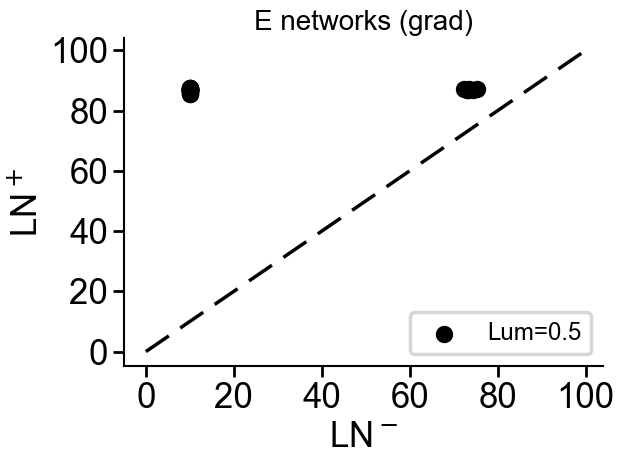

In [11]:
# TODO: This actually has to be a line plot
fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')


top_n = len(runs_dict["runs_e_network_ln"])

for top in range(top_n):

    vanilla_dann_acc = runs_dict["runs_e_network_ln"][top].summary['test_acc']

    for rn in runs_dict["runs_e_network_noln"]:
        if same_config(rn.config, runs_dict["runs_e_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
            plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color="black")

plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color="black", label=f"Lum={bright_factor}")

ax.set_xlabel(f"LN$^-$", fontsize=25)
ax.set_ylabel("LN$^+$", fontsize=25)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_title(f"E networks (grad)", fontsize=20)
list_line = range(100)
# ax.set_xlim(0, 20)
# ax.set_ylim(78, 86)
ax.legend()
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

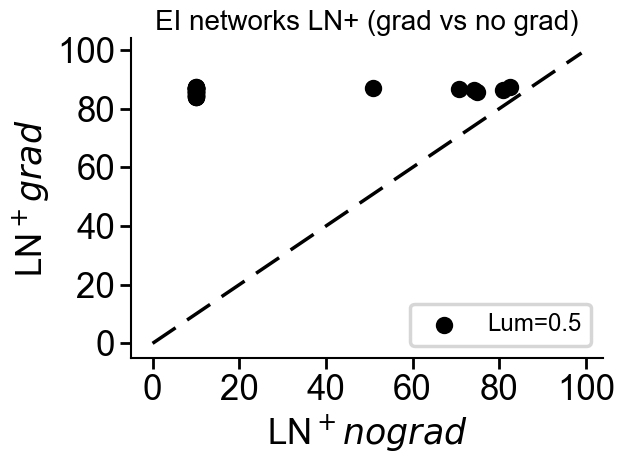

In [17]:
# TODO: This actually has to be a line plot
fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')


top_n = len(runs_dict["runs_ei_network_ln"])

for top in range(top_n):

    vanilla_dann_acc = runs_dict["runs_ei_network_ln"][top].summary['test_acc']

    for rn in runs_dict["runs_ei_network_ln_nograd"]:
        if same_config(rn.config, runs_dict["runs_ei_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
            plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color="black")

plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color="black", label=f"Lum={bright_factor}")

ax.set_xlabel(f"LN$^+ no grad$", fontsize=25)
ax.set_ylabel("LN$^+ grad$", fontsize=25)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_title(f"EI networks LN+ (grad vs no grad)", fontsize=20)
list_line = range(100)
# ax.set_xlim(0, 20)
# ax.set_ylim(78, 86)
ax.legend()
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

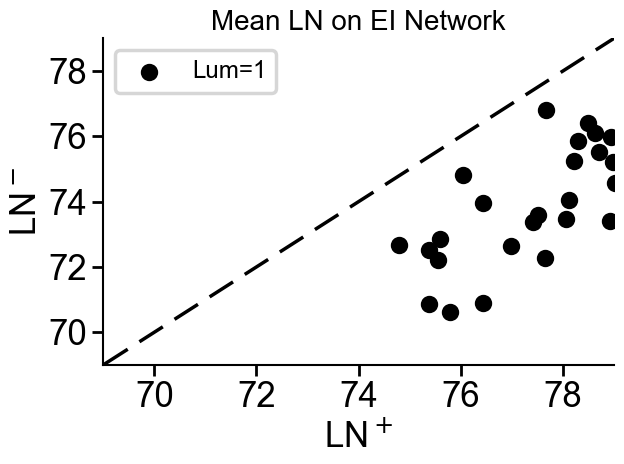

In [8]:
# TODO: This actually has to be a line plot
fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')


top_n = len(runs_dict["runs_ei_network_ln"])

for top in range(top_n):

    vanilla_dann_acc = runs_dict["runs_ei_network_ln"][top].summary['test_acc']

    for rn in runs_dict["runs_ei_network_noln"]:
        if same_config(rn.config, runs_dict["runs_ei_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
            plt.scatter(vanilla_dann_acc, rn.summary['test_acc'], color="black")

plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color="black", label=f"Lum={bright_factor}")

ax.set_xlabel(f"LN$^+$", fontsize=25)
ax.set_ylabel("LN$^-$", fontsize=25)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_title(f"Mean LN on EI Network", fontsize=20)
list_line = range(100)
ax.set_xlim(69, 79)
ax.set_ylim(69, 79)
ax.legend()
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

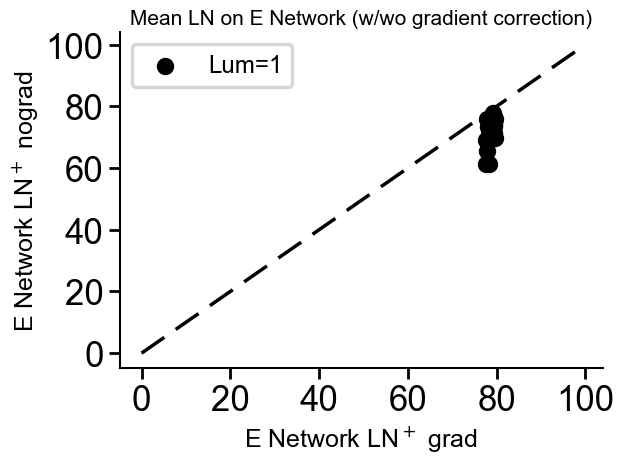

In [9]:
fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')


top_n = len(runs_dict["runs_e_network_ln"])

for top in range(top_n):

    vanilla_dann_acc = runs_dict["runs_e_network_ln"][top].summary['test_acc']

    for rn in runs_dict["runs_e_network_ln_nograd"]:
        if same_config(rn.config, runs_dict["runs_e_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
            plt.scatter( vanilla_dann_acc, rn.summary['test_acc'], color="black")

plt.scatter( vanilla_dann_acc, rn.summary['test_acc'], color="black", label=f"Lum={bright_factor}")

ax.set_xlabel(f"E Network LN$^+$ grad", fontsize=18)
ax.set_ylabel("E Network LN$^+$ nograd", fontsize=18)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_title(f"Mean LN on E Network (w/wo gradient correction)", fontsize=15)
list_line = range(100)
# ax.set_xlim(66, 80)
# ax.set_ylim(66, 80)
ax.legend()
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

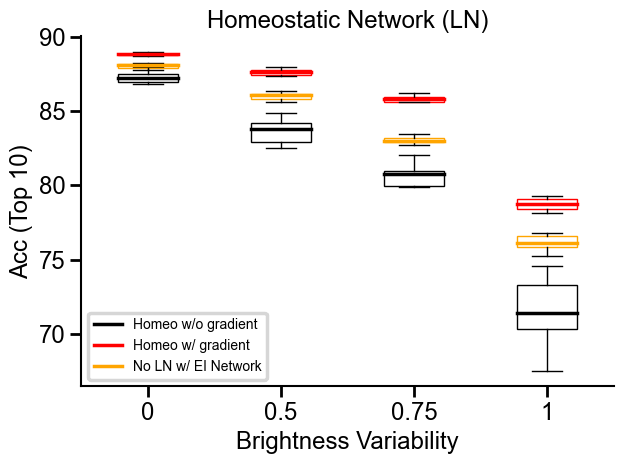

In [9]:
fig, ax = plt.subplots()
brightness_factor = [0, 0.5, 0.75, 1]
best_n_runs = 10
noln_e_acc = []
no_ln_acc = []
ln_e_acc = []
lmbda=1

for bf in brightness_factor:

    layernorm_e_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.normtype": 0, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.homeostasis":1, "config.use_testset": True, "config.feedback_alignment":1}, order="-summary_metrics.test_acc")[:best_n_runs]
    layernorm_e_no_bkwd_network = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.normtype": 0, "config.excitation_training": 1, "config.normtype_detach": 1,
                                                            "config.homeostasis":1, "config.use_testset": True, "config.feedback_alignment":1}, order="-summary_metrics.test_acc")[:best_n_runs]
    network_no_ln =  fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bf, "config.layer_norm": 0, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")[:best_n_runs]
    
                                                                
    noln_e_acc.append([run_noln.summary['test_acc'] for run_noln in layernorm_e_no_bkwd_network ])
    ln_e_acc.append([run_ln.summary['test_acc'] for run_ln in layernorm_e_network])
    no_ln_acc.append([run_ln.summary['test_acc'] for run_ln in network_no_ln])

bp1_e = ax.boxplot(np.array(noln_e_acc).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
                         showbox=True, showfliers=False)
bp2_e = ax.boxplot(np.array(ln_e_acc).T, patch_artist=True, boxprops=dict(color='red', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='red'),
                         showfliers=False)
bp3_e = ax.boxplot(np.array(no_ln_acc).T, patch_artist=True, boxprops=dict(color='orange', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='orange'),
showfliers=False)
# Create custom x-axis tick labels
custom_xticks = ['0', '0.5', '0.75', '1']
ax.set_xticks(np.arange(1, len(custom_xticks) + 1))
ax.set_xticklabels(custom_xticks)

ax.set_xlabel('Brightness Variability')
ax.set_ylabel(f'Acc (Top {best_n_runs})')
ax.legend([bp1_e["medians"][0], bp2_e["medians"][0], bp3_e["medians"][0]], ['Homeo w/o gradient', 'Homeo w/ gradient', 'No LN w/ EI Network'], fontsize="10", loc ="best")
# ax.set_yscale('log')
ax.set_title('Homeostatic Network (LN)')
plt.show()

30
30


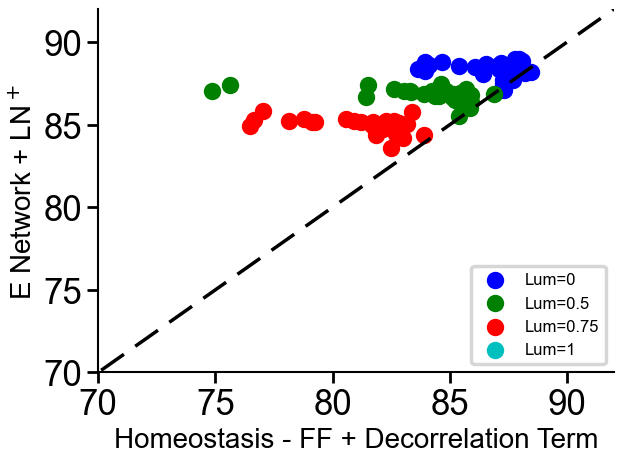

In [13]:

fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')
clr = ['b', 'g', 'r', 'c']

for idx, bfi in enumerate([0, 0.5, 0.75, 1]):

    runs_dict = dict()
    runs_dict["runs_e_network_ln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                                "config.brightness_factor": bfi, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                                "config.use_testset": True}, order="-summary_metrics.test_acc")
    runs_dict["runs_mean_homeostatic_network"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bfi, "config.normtype": 0, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.homeostasis":1, "config.use_testset": True, "config.feedback_alignment":1}, order="-summary_metrics.test_acc")

    top_n = len(runs_dict["runs_e_network_ln"])

    for top in range(top_n):

        vanilla_dann_acc = runs_dict["runs_e_network_ln"][top].summary['test_acc']

        for rn in runs_dict["runs_mean_homeostatic_network"]:
            if same_config(rn.config, runs_dict["runs_e_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
                plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color=clr[idx])

    plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color=clr[idx], label=f"Lum={bfi}")

print(len(runs_dict["runs_e_network_ln"]))
print(len(runs_dict["runs_mean_homeostatic_network"]))
ax.set_xlabel(f"Homeostasis - FF + Decorrelation Term", fontsize=20)
ax.set_ylabel("E Network + LN$^+$", fontsize=20)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
# ax.set_title(f"LN+ on E and H networks (with grad)", fontsize=17)
list_line = range(100)
ax.set_xlim(70, 92)
ax.set_ylim(70, 92)
ax.legend(prop={'size': 12})
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

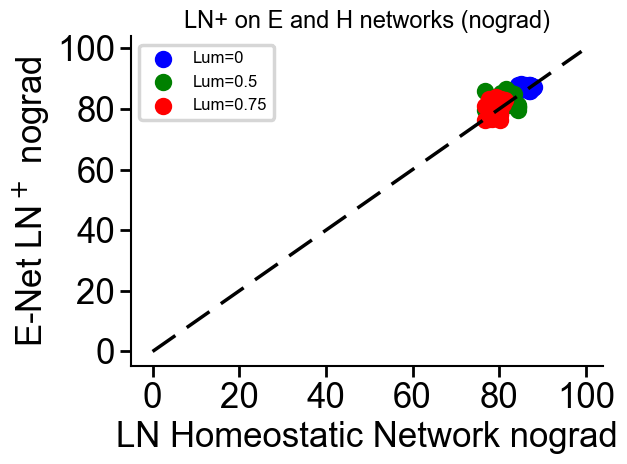

In [28]:

fig, ax = plt.subplots()

cmap = plt.get_cmap('viridis')
clr = ['b', 'g', 'r', 'c']

for idx, bfi in enumerate([0, 0.5, 0.75, 1]):

    runs_dict = dict()
    runs_dict["runs_e_network_ln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                                "config.brightness_factor": bfi, "config.layer_norm": 1, "config.excitation_training": 1, "config.normtype_detach": 1,
                                                                "config.use_testset": True}, order="-summary_metrics.test_acc")
    runs_dict["runs_mean_homeostatic_network"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": bfi, "config.normtype": 0, "config.excitation_training": 1, "config.normtype_detach": 1,
                                                            "config.homeostasis":1, "config.use_testset": True}, order="-summary_metrics.test_acc")

    top_n = len(runs_dict["runs_e_network_ln"])

    for top in range(top_n):

        vanilla_dann_acc = runs_dict["runs_e_network_ln"][top].summary['test_acc']

        for rn in runs_dict["runs_mean_homeostatic_network"]:
            if same_config(rn.config, runs_dict["runs_e_network_ln"][top].config, keys=['lr', 'wd','inhib_lrs', 'momentum', 'inhib_momentum']):
                plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color=clr[idx])

    plt.scatter(rn.summary['test_acc'], vanilla_dann_acc, color=clr[idx], label=f"Lum={bfi}")

ax.set_xlabel(f"LN Homeostatic Network nograd", fontsize=25)
ax.set_ylabel("E-Net LN$^+$ nograd", fontsize=25)
# Set larger font sizes for the tick numbers
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
ax.set_title(f"LN+ on E and H networks (nograd)", fontsize=17)
list_line = range(100)
# ax.set_xlim(60, 92)
# ax.set_ylim(60, 92)
ax.legend(prop={'size': 12})
ax.plot(list_line, list_line, label='y = x', color='black', linestyle='--')
plt.show()

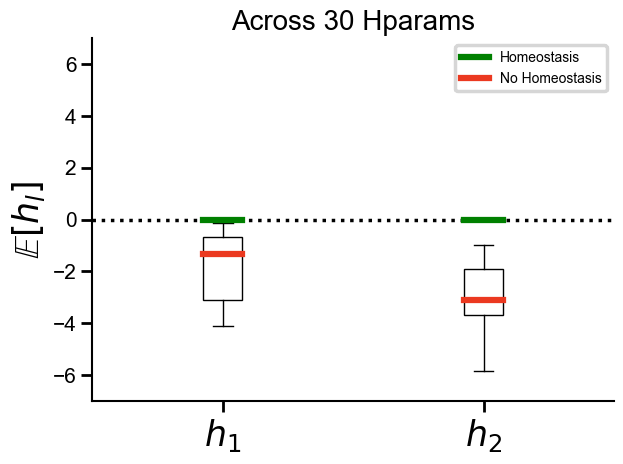

In [14]:
fig, ax1 = plt.subplots()

runs_dict["runs_ei_network_noln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 1, "config.layer_norm": 0, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")

mu_dann = []

mu_dann.append([run_van.summary['train_fc0_mu'] for run_van in runs_dict["runs_mean_homeostatic_network"]])

mu_dann.append([run_van.summary['train_fc1_mu'] for run_van in runs_dict["runs_mean_homeostatic_network"]])

bp1 = ax1.boxplot(np.array(mu_dann).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'), showfliers=False)

mu_control = []

mu_control.append([run_van.summary['train_fc0_mu'] for run_van in runs_dict["runs_ei_network_noln"]])

mu_control.append([run_van.summary['train_fc1_mu'] for run_van in runs_dict["runs_ei_network_noln"]])


bp2 = ax1.boxplot(np.array(mu_control).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
                            showfliers=False)

median_colors = ["green", '#eb3920']

# Iterate over each median line and set its color
for median, color in zip(bp1['medians'], median_colors):
    median.set_color(median_colors[0])
    median.set_linewidth(4.5)  # Set thickness

for median, color in zip(bp2['medians'], median_colors):
    median.set_color(median_colors[1])
    median.set_linewidth(4.5)  # Set thickness

# Create custom x-axis tick labels
custom_xticks = ["$h_1$", "$h_2$"]
ax1.set_xticks(np.arange(1, len(custom_xticks) + 1))
ax1.set_xticklabels(custom_xticks, fontsize=25)
ax1.axhline(y=0, color='black', linestyle='dotted')

ax1.set_ylabel('First Moment', fontsize=20)
ax1.set_ylabel('$\mathbb{E}[h_l]$', fontsize=25)
ax1.set_ylim(-7, 7)
# ax1.set_yscale('log')

# Set larger font sizes for the tick numbers
plt.yticks(fontsize=15)
ax1.set_title("Across 30 Hparams", fontsize=20)
ax1.legend([bp1["medians"][0], bp2["medians"][0]], ['Homeostasis', 'No Homeostasis'], fontsize="10", loc ="best")

plt.show()

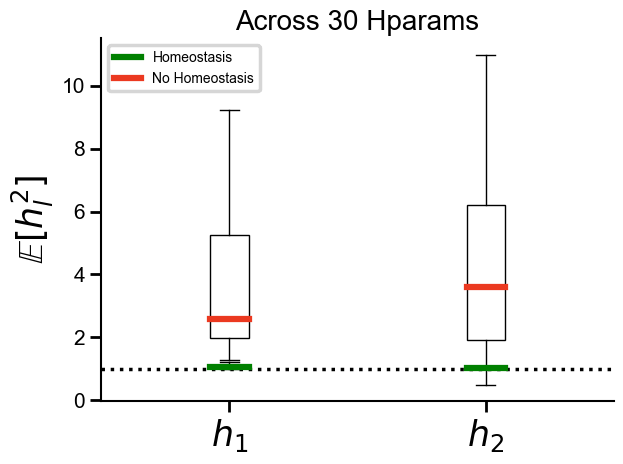

In [13]:
fig, ax1 = plt.subplots()

runs_dict["runs_ei_network_noln"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 0.75, "config.layer_norm": 0, "config.excitation_training": 0, "config.normtype_detach": 0,
                                                            "config.use_testset": True}, order="-summary_metrics.test_acc")

runs_dict["runs_mean_homeostatic_network"] = fetch_runs(api, entity='project_danns', project_name='Luminosity_LNHomeostasis', filters={"config.dataset": "fashionmnist", 
                                                            "config.brightness_factor": 0.75, "config.normtype": 0, "config.excitation_training": 1, "config.normtype_detach": 0,
                                                            "config.homeostasis":1, "config.feedback_alignment":1, "config.use_testset": True}, order="-summary_metrics.test_acc")

mu_dann = []

mu_dann.append([run_van.summary['train_fc0_var'] for run_van in runs_dict["runs_mean_homeostatic_network"]])

mu_dann.append([run_van.summary['train_fc1_var'] for run_van in runs_dict["runs_mean_homeostatic_network"]])


bp1 = ax1.boxplot(np.array(mu_dann).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
                            showfliers=False)

mu_control = []

mu_control.append([run_van.summary['train_fc0_var'] for run_van in runs_dict["runs_ei_network_noln"]])

mu_control.append([run_van.summary['train_fc1_var'] for run_van in runs_dict["runs_ei_network_noln"]])


bp2 = ax1.boxplot(np.array(mu_control).T, patch_artist=True, boxprops=dict(color='black', facecolor='none'), medianprops=dict(linestyle='-', linewidth=2.5, color='black'),
                            showfliers=False)

median_colors = ["green", '#eb3920']

# Iterate over each median line and set its color
for median, color in zip(bp1['medians'], median_colors):
    median.set_color(median_colors[0])
    median.set_linewidth(4.5)  # Set thickness

for median, color in zip(bp2['medians'], median_colors):
    median.set_color(median_colors[1])
    median.set_linewidth(4.5)  # Set thickness

# Create custom x-axis tick labels
custom_xticks = ["$h_1$", "$h_2$"]
ax1.set_xticks(np.arange(1, len(custom_xticks) + 1))
ax1.set_xticklabels(custom_xticks, fontsize=25)
ax1.axhline(y=1, color='black', linestyle='dotted')

ax1.set_ylabel('First Moment', fontsize=20)
ax1.set_ylabel('$\mathbb{E}[h_l^2]$', fontsize=25)
#ax1.set_yscale('log')
# ax1.set_ylim(0,2)

# Set larger font sizes for the tick numbers
plt.yticks(fontsize=15)
ax1.set_title("Across 30 Hparams", fontsize=20)

ax1.legend([bp1["medians"][0], bp2["medians"][0]], ['Homeostasis', 'No Homeostasis'], fontsize="10", loc ="best")
plt.show()